# Analyses and Figures

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
from statsmodels.stats.descriptivestats import sign_test

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
import seaborn as sns

In [2]:
import os
import hypervolumes as hv

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [ ]:
fpath_out = "path_to_output_directory"

In [38]:
sns.set_theme(context="paper", style="whitegrid", font_scale=1.5, rc={"lines.linewidth": 2})
mpl.rcParams.update({'font.size': 30})

## Realizing the plots

### Hypervolume representation (Fig. B1)

In [34]:
Cmin, Cmax = 0.0, 0.3
Mmin, Mmax = 0.0, 0.09
Lmin, Lmax = 0.002, 0.5

In [35]:
biome, N ='med', 50

df2 = pd.read_csv(os.path.join(fpath_out, 'coms-fire-bioindex-fd.csv'))
df2[(df2['N']==N)&(df2['biome']==biome) & (df2['srichness']>5)].sort_values('frichness')

Unnamed: 0 biome   N  ncom  init         frt  srichness  isimpson  \
86237       86237   med  50   736    18  312.500000          6  2.335600   
86253       86253   med  50   736    34  263.157898          7  2.358557   
55207       55207   med  50   139    32   68.493149          6  2.873017   
86259       86259   med  50   736    40  238.095245          6  2.386727   
86266       86266   med  50   736    47  333.333344          6  2.441202   
...           ...   ...  ..   ...   ...         ...        ...       ...   
63517       63517   med  50   299    22   14.749263          7  5.015234   
63518       63518   med  50   299    23   14.619883          7  4.919671   
63536       63536   med  50   299    41   15.060241          7  4.922701   
64928       64928   med  50   326    29   21.551724          6  4.026817   
64911       64911   med  50   326    12   22.935780          6  4.188019   

       frichness  fdivergence  
86237   0.000019     0.123683  
86253   0.000019     0.129520  
55207   0.000027     0.121316  
86259   0.000029     0.132045  
86266   0.000030     0.138876  
...          ...          ...  
63517   0.052259     0.520581  
63518   0.052426     0.529600  
63536   0.052705     0.532610  
64928   0.056811     0.595018  
64911   0.058359     0.573568  

[2002 rows x 10 columns]

bandwidths: [0.14123685 0.09307964 0.05814203 0.15505691 0.11121955]
sample: 284


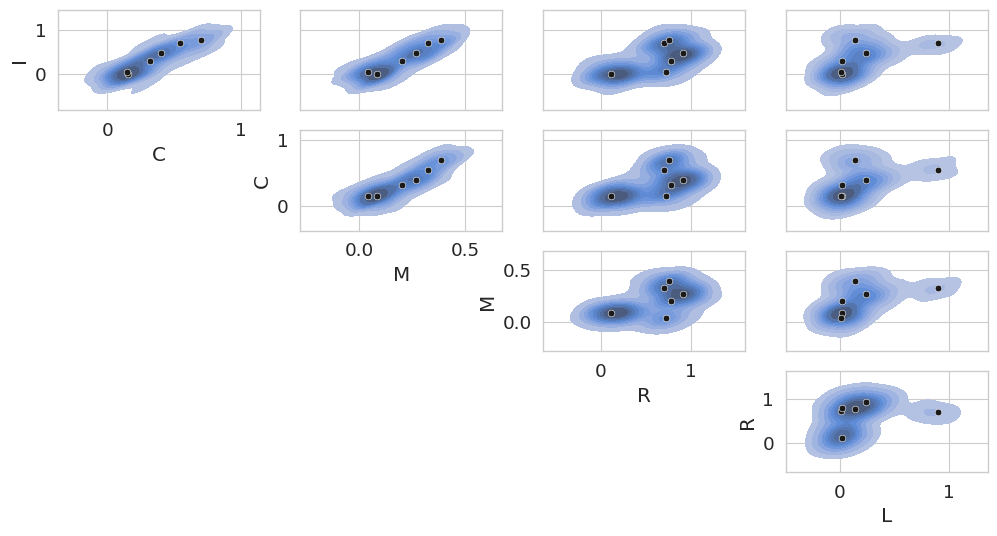

In [ ]:
df = df2[(df2['N']==N)&(df2['biome']==biome)&(df2['ncom']==326)&(df2['init']==12)]
df_temp = pd.DataFrame(index=['I','C','R','L']).T

NP = df['N'].values[0]
i_com = df['ncom'].values[0]
init = df['init'].values[0]

df = pd.read_csv(os.path.join(fpath_out,f'comp_{biome}{NP}/coms-n{NP}-{biome}-{i_com}-{init}.csv'))

# range transformation
df['I'] = (df['I'] - 1) / (NP-1)
df['C'] = (df['C'] - Cmin) / (Cmax - Cmin)
df['M'] = (df['M'] - Mmin) / (Mmax - Mmin)
df['L'] = (df['L'] - Lmin) / (Lmax - Lmin)

np_temp = df.to_numpy()[:,1:]
hv_temp = hv.hypervolume(np_temp, verbose=True)
df_hv = pd.DataFrame(hv_temp, columns=['I','C','M','R','L'])

df_sng = df.drop_duplicates()

fig, axs = plt.subplots(4, 4, figsize=(12, 6))

trait_list = ['I','C','M','R','L']
for i,y in enumerate(trait_list):
    for j,x in enumerate(trait_list[i+1:]):
        if x != y:
            sns.kdeplot(data=df_hv, x=x, y=y, warn_singular=False, ax=axs[i,j+i], fill=True)
            sns.scatterplot(data=df_sng, x=x, y=y, ax=axs[i,j+i], c='k')
        if j!=0:
            axs[i,j+i].label_outer()
        if i!=0:
            axs[j+i,i-1].remove()

# plt.tight_layout(h_pad=0.00001, w_pad=0.00001)

### Biodiversity in Fire model vs Tilman

In [40]:
df_diff = pd.read_csv(os.path.join(fpath_out, 'biodindex-difference.csv'))
df_diff.loc[df_diff['eco-type']=='med10','eco-type'] = 'Med-10'
df_diff.loc[df_diff['eco-type']=='med50','eco-type'] = 'Med-50'
df_diff.loc[df_diff['eco-type']=='bor10','eco-type'] = 'Bor-10'

##### Sign Test (Table C1)
Applied to the discrete distribution of $\Delta S$

In [ ]:
for bioind in ['srichness']:

    print(bioind)
    for biome in ['Med-10', 'Med-50', 'Bor-10']:

        arrdat = df_diff[df_diff['eco-type']==biome][bioind].to_numpy()

        M, pvalue = sign_test(samp=arrdat, mu0=0)
        
        print(biome)
        print('M:', '{:.0f}'.format(M), '\npvalue:', '{:.4f}'.format(pvalue), '\n', pvalue<0.05, M>0, '\n')
    print('\n')

srichness
Med-10
M: 610 
pvalue: 0.0000 
 True True 

Med-50
M: 2780 
pvalue: 0.0000 
 True True 

Bor-10
M: 3612 
pvalue: 0.0000 
 True True 





##### Wilcoxon signed-rank test (Table C2)
The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

In [41]:
for bioind in ['isimpson', 'frichness', 'fdivergence']:

    print(bioind)
    for biome in ['Med-10', 'Med-50', 'Bor-10']:

        arrdat = df_diff[df_diff['eco-type']==biome][bioind].to_numpy()

        stat, pvalue = scs.wilcoxon(x=arrdat, alternative='less', zero_method='wilcox')
        
        print(biome)
        print('statistic:', '{:.0f}'.format(stat), '\npvalue:', '{:.4f}'.format(pvalue), '\n', pvalue<0.05, '\n')
    print('\n')

isimpson
Med-10
statistic: 83831851 
pvalue: 1.0000 
 False 

Med-50
statistic: 557311739 
pvalue: 1.0000 
 False 

Bor-10
statistic: 99464068 
pvalue: 1.0000 
 False 



frichness
Med-10
statistic: 67349085 
pvalue: 0.0000 
 True 

Med-50
statistic: 353690524 
pvalue: 0.0000 
 True 

Bor-10
statistic: 64329307 
pvalue: 1.0000 
 False 



fdivergence
Med-10
statistic: 97981271 
pvalue: 1.0000 
 False 

Med-50
statistic: 588853075 
pvalue: 1.0000 
 False 

Bor-10
statistic: 101754177 
pvalue: 1.0000 
 False 





#### Plot the distributions (Fig. 1)

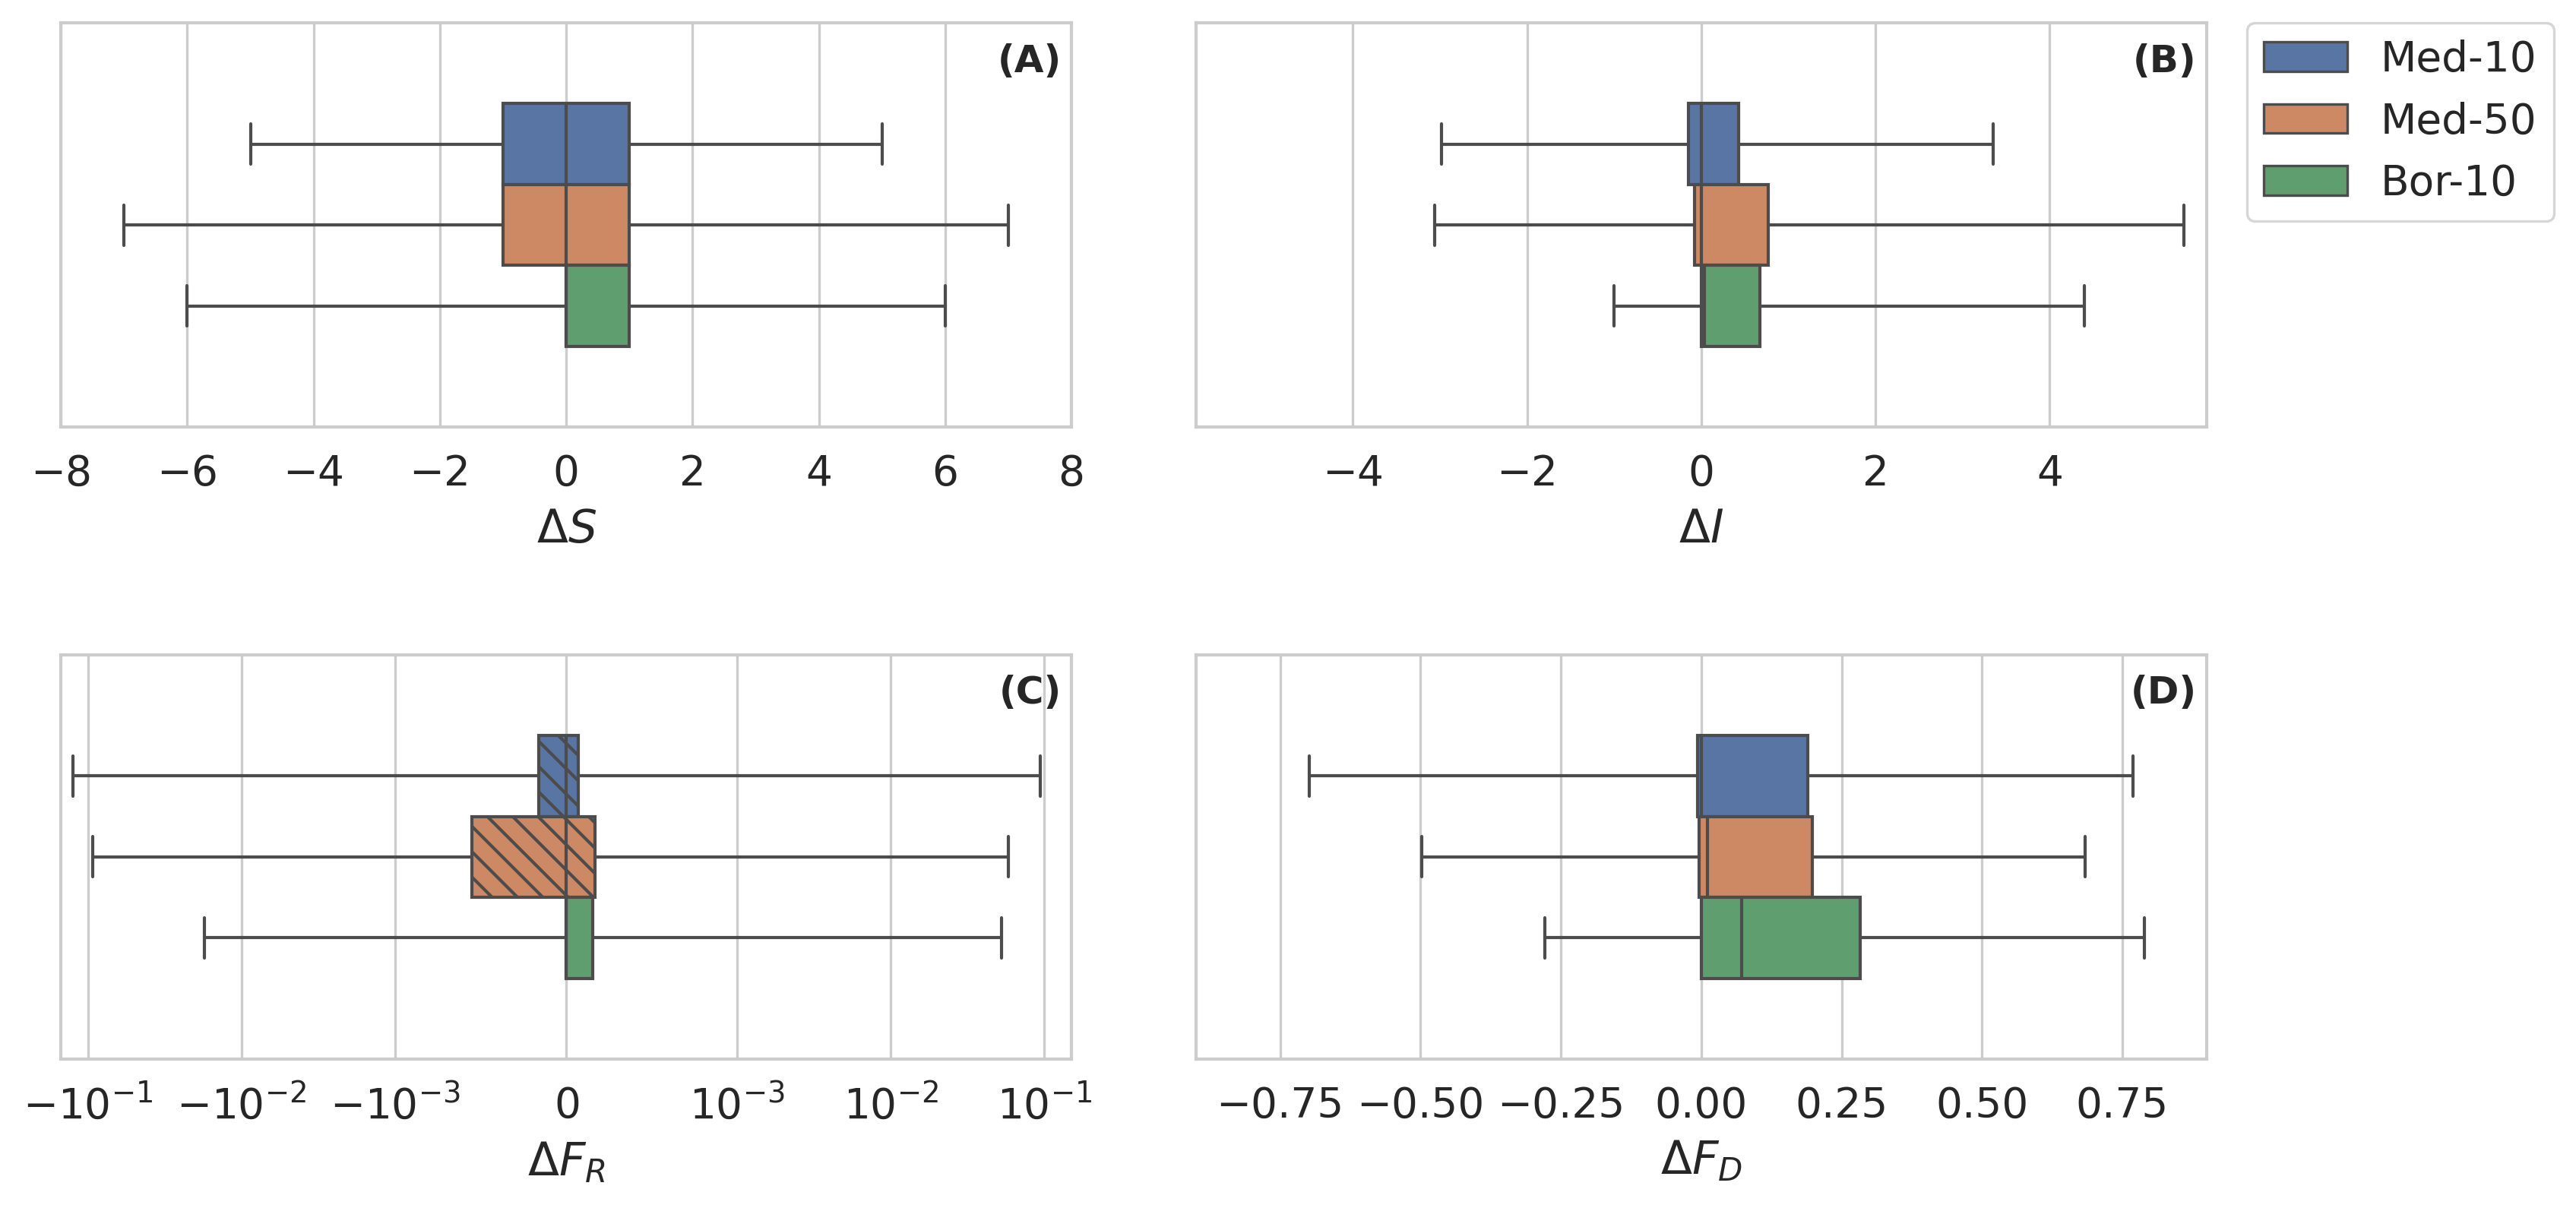

In [ ]:
fig, ax2 = plt.subplots(2,2, figsize=(12,6), sharey=True, dpi=300)

data = df_diff

hue_order = ['Med-10', 'Med-50', 'Bor-10']

sns.boxplot(data=data, x="srichness", hue='eco-type', hue_order=hue_order, width=.6, whis=1000, ax=ax2[0,0], legend=False)
# sns.boxplot(data=data, x="srichness", hue='eco-type', hue_order=hue_order, width=.6, ax=ax2[0,0], legend=False)
ax2[0,0].set_xlabel(r'$\Delta S$')
ax2[0,0].set_xlim(-8, 8)
# ax2[0,0].set_xticks(np.arange(-4, 9, 2))

sns.boxplot(data=data, x="isimpson", hue='eco-type', hue_order=hue_order, width=.6, whis=1000, ax=ax2[0,1])
ax2[0,1].set_xlabel(r'$\Delta I$')
ax2[0,1].set_xlim(-5.8, 5.8)

box = sns.boxplot(data=data, x="frichness", hue='eco-type', hue_order=hue_order, width=.6, whis=3000, ax=ax2[1,0], legend=False)
# Set a different hatch for each bar
hatches = ['\\\\\\', '\\\\\\', '']
for i,thisbar in enumerate(box.patches):
    thisbar.set_hatch(hatches[i])
# sns.boxplot(data=data, x="frichness", hue='eco-type', width=.6, ax=ax2[1,0], legend=False)
ax2[1,0].set_xlabel(r'$\Delta F_R$')
ax2[1,0].set_xscale('symlog', linthresh=0.001)
ax2[1,0].set_xlim(-0.15, 0.15)
# ax2[1,0].set_xticks([-0.1, -0.01, -0.001, 0.0, 0.001, 0.01, 0.1])

sns.boxplot(data=data, x="fdivergence", hue='eco-type', hue_order=hue_order, width=.6, whis=1000, ax=ax2[1,1], legend=False)
ax2[1,1].set_xlabel(r'$\Delta F_D$')
ax2[1,1].set_xlim(-0.9, 0.9)

letters = ['(A)', '(B)', '(C)', '(D)']
for i, ax in enumerate(ax2.flat):
    ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

ax2[0,1].legend(bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)

plt.tight_layout()

### Diversity indicators over fire return time

####  Quantile Regression (Tables D1-D12)
Quantile Regression libraries and functions

In [51]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

max_iter = 350000

In [52]:
def wald_test(model):

# Get the coefficients (excluding intercept)
    beta = model.params[1:]  # Coefficients for X and X_squared

    # Get the covariance matrix of the estimated coefficients
    cov_matrix = model.cov_params().iloc[1:, 1:]  # Covariance for X and X_squared

    # Wald statistic calculation: W = beta' * (cov^-1) * beta
    wald_stat = np.dot(np.dot(beta.T, np.linalg.inv(cov_matrix)), beta)

    # Degrees of freedom is the number of coefficients (excluding the intercept)
    df = len(beta)

    # Compute p-value based on chi-squared distribution
    p_value = scs.chi2.sf(wald_stat, df)

    # print(f"Wald Test Statistic: {wald_stat:.4f}")
    # print(f"p-value: {p_value:.4f}")

    return wald_stat, p_value

In [58]:
def aic_test(Y, X, Y_pr, model):
    # return aic metric
    k_params = model.df_model + model.k_constant
    
    # Estimate maximized log likelihood
    nobs = float(X.shape[0])
    nobs2 = nobs / 2.0
    nobs = float(nobs)
    resid = Y - Y_pr
    ssr = np.sum((resid)**2)
    llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2

    return -2 * llf + 2 * k_params

In [59]:
def best_poly_quantile_regression(Y, X, quantile=0.5, max_degree=5, verbose=True):
    best_degree = None
    best_aic = np.inf  # Initialize to a large value
    best_model = None

    # Data preparation
    data = pd.DataFrame({'X': X, 'Y': Y})

    # Iterate over polynomial degrees from 1 to max_degree
    for degree in range(1, max_degree + 1):
        # Construct formula for polynomial regression up to the current degree
        formula = 'Y ~ ' + ' + '.join([f'np.power(X, {i})' for i in range(1, degree + 1)])

        # Fit quantile regression for the current degree
        model = smf.quantreg(formula, data).fit(q=quantile, max_iter=max_iter)
        
        # Predict the values for Y
        Y_pr = model.predict(data)
        
        # Calculate AIC for the current model
        aic_value = aic_test(data['Y'], data['X'], Y_pr, model)
        
        # print(f'Degree {degree}: AIC = {aic_value:.4f}')

        w_stat, w_pval = wald_test(model)
        # keep only the statistically significant regression
        if w_pval < 0.05:
            # Update the best model if current AIC is smaller
            if aic_value < best_aic:
                best_aic = aic_value
                best_degree = degree
                best_model = model

    if verbose:
        print(f'Best Polynomial Degree: {best_degree} with AIC = {best_aic:.4f}\n')
    return best_degree, best_model, best_aic

In [60]:
# Common parameters for the plots
sz = 10
al = 0.3

frt_max = 1800
frt_min = 4

colorq = ['crimson','gold','cornflowerblue'] #['purple', 'darkorange', 'forestgreen']
quantiles = [.95, .85, .75]

#### Compositional Diversity ($S$, $I$) with Quantile Regression (Fig. 2)

In [63]:
def plot_qreg_cdiv(df, ax2, i, n, biome, quantiles=[.75, .85, .95], colorq=['crimson','gold','cornflowerblue'], orientation='v', verbose=True):

    if orientation=='v':
        ax2[1,0].set_ylabel("$S$")
        ax2[1,1].set_ylabel("$I$")
    elif orientation=='o':
        ax2[0,0].set_ylabel("$S$")
        ax2[1,0].set_ylabel("$I$")

    if verbose:
        print(f'n={n}, {biome}')

    if np.any(df):

        data = df[(df['N'] == n) & (df['biome'] == biome)]

        if orientation=='v':
            ax2[i,0].scatter('frt', 'srichness', data=data, s=sz, alpha=al, c='grey', label='')
            ax2[i,1].scatter('frt', 'isimpson', data=data, s=sz, alpha=al, c='grey', label='')
            
        elif orientation=='o':
            ax2[0,i].scatter('frt', 'srichness', data=data, s=sz, alpha=al, c='grey', label='')
            ax2[1,i].scatter('frt', 'isimpson', data=data, s=sz, alpha=al, c='grey', label='')



        # QUANTILE REGRESSION

        x_p = np.linspace(data.frt.min(), data.frt.max(), 100)

        for q,cq in zip(quantiles,colorq):
            if verbose:
                print(f'Quantile={q}')
            X = data['frt']
            Y = data['srichness']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)

            if orientation=='v':
                ax2[i,0].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[0,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))

            if verbose:
                print('Inverse Simpson Index')
            Y = data['isimpson']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            
            if orientation=='v':
                ax2[i,1].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[1,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))


n=10, med
Quantile=0.95
Best Polynomial Degree: 5 with AIC = 98596.6062

Inverse Simpson Index
Best Polynomial Degree: 5 with AIC = 77958.1413

Quantile=0.85
Best Polynomial Degree: 3 with AIC = 79349.6778

Inverse Simpson Index
Best Polynomial Degree: 2 with AIC = 58017.4532

Quantile=0.75
Best Polynomial Degree: 5 with AIC = 72258.5083

Inverse Simpson Index
Best Polynomial Degree: 3 with AIC = 46526.1811

n=50, med
Quantile=0.95
Best Polynomial Degree: 5 with AIC = 258743.0958

Inverse Simpson Index
Best Polynomial Degree: 4 with AIC = 199608.6200

Quantile=0.85
Best Polynomial Degree: 2 with AIC = 221169.9683

Inverse Simpson Index
Best Polynomial Degree: 5 with AIC = 159702.2440

Quantile=0.75
Best Polynomial Degree: 4 with AIC = 197622.1811

Inverse Simpson Index
Best Polynomial Degree: 3 with AIC = 136232.0359

n=10, bor
Quantile=0.95
Best Polynomial Degree: 5 with AIC = 108244.8940

Inverse Simpson Index
Best Polynomial Degree: 5 with AIC = 78213.7427

Quantile=0.85
Best Polyno

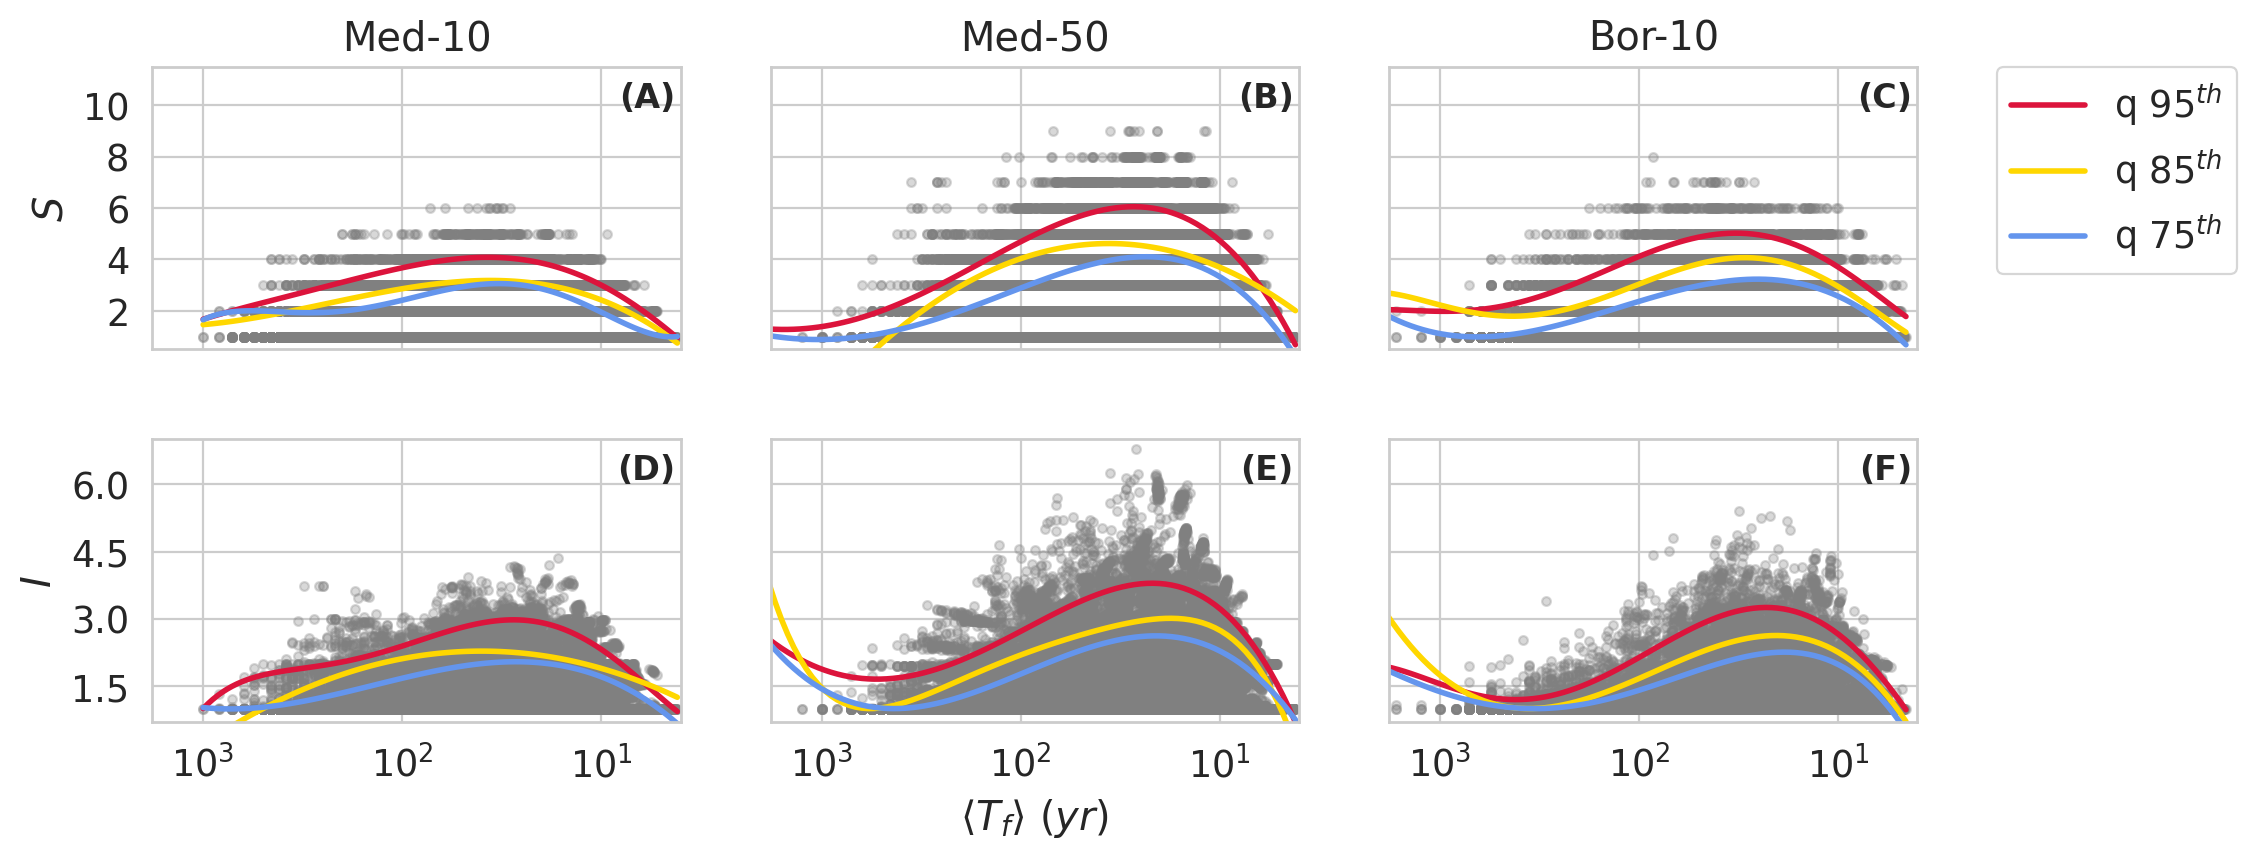

In [ ]:
fig, ax2 = plt.subplots(2,3, figsize=(12,5), sharex=True, sharey='row', dpi=200)

n=10
i = 0
biome='med'
plot_qreg_cdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=50
i = 1
biome='med'
plot_qreg_cdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=10
i = 2
biome='bor'
plot_qreg_cdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

ax2[1,1].set_xlabel(r"$\langle T_f \rangle$ ($yr$)")

axs = ax2.flatten()
for ax in axs:
    ax.invert_xaxis()
    ax.set(xlim=(np.log10(frt_max),np.log10(frt_min)))
    ticks = [1, 2, 3]
    ax.set_xticks(ticks)
    ax.set_xticklabels([fr'$10^{i}$' for i in ticks])

for ax in ax2[0]:
    ax.set_yticks(np.linspace(0, 10, 6))
    ax.set_ylim([0.5,11.5])

for ax in ax2[1]:
    ax.set_yticks(np.linspace(1.5, 6.0, 4))
    ax.set_ylim([0.7,7.0])

ax2[0,0].set_title('Med-10')
ax2[0,1].set_title('Med-50')
ax2[0,2].set_title('Bor-10')

letters = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']
for i, ax in enumerate(ax2.flat):
    ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

ax2[0,-1].legend(bbox_to_anchor=(1.15, 1), loc="upper left", borderaxespad=0)
# ax2[0,0].legend()

plt.tight_layout()

#### Functional Diversity ($F_R$, $F_D$) with Quantile Regression (Fig. 3)

In [68]:
def plot_qreg_fdiv(df, ax2, i, n, biome, quantiles=[.95, .85, .75], colorq=['crimson','gold','cornflowerblue'], orientation='o', verbose=True):

    if orientation=='v':
        ax2[1,0].set_ylabel("$F_R$")
        ax2[1,1].set_ylabel("$F_D$")
    elif orientation=='o':
        ax2[0,0].set_ylabel("$F_R$")
        ax2[1,0].set_ylabel("$F_D$")
    

    if verbose:
        print(f'n={n}, {biome}')

    if np.any(df):

        data = df[(df['N'] == n) & (df['biome'] == biome)]
        
        if orientation=='v':
            ax2[i,0].scatter('frt', 'frichness', data=data, s=sz, alpha=al, c='grey', label='')
            ax2[i,1].scatter('frt', 'fdivergence', data=data, s=sz, alpha=al, c='grey', label='')
        elif orientation=='o':
            ax2[0,i].scatter('frt', 'frichness', data=data, s=sz, alpha=al, c='grey', label='')
            ax2[1,i].scatter('frt', 'fdivergence', data=data, s=sz, alpha=al, c='grey', label='')

        # QUANTILE REGRESSION

        x_p = np.linspace(data.frt.min(), data.frt.max(), 100)

        for q,cq in zip(quantiles,colorq):
            if verbose:
                print(f'Quantile={q}')

            X = data['frt']

            if verbose:
                print('Functional Richness')

            Y = data['frichness']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            if orientation=='v':
                ax2[i,0].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[0,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))

            if verbose:
                print('Functional Divergence')

            Y = data['fdivergence']
            best_degree, best_model, best_aic = best_poly_quantile_regression(Y, X, quantile=q, max_degree=5, verbose=verbose)
            df_pred = pd.DataFrame({'X': x_p})
            # Add the necessary polynomial terms up to the best degree found
            for degree in range(2, best_degree + 1):
                df_pred[f'np.power(X, {degree})'] = np.power(df_pred['X'], degree)
            if orientation=='v':
                ax2[i,1].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))
            elif orientation=='o':
                ax2[1,i].plot(x_p, best_model.predict(df_pred), linestyle='-', color=cq, label='q {}{}'.format(int(q*100), r'$^{th}$'))


n=10, med
Quantile=0.95
Functional Richness
Best Polynomial Degree: 2 with AIC = -155954.9184

Functional Divergence
Best Polynomial Degree: 5 with AIC = 16689.0658

Quantile=0.85
Functional Richness
Best Polynomial Degree: 4 with AIC = -183700.0813

Functional Divergence
Best Polynomial Degree: 4 with AIC = 3714.8823

Quantile=0.75
Functional Richness
Best Polynomial Degree: 5 with AIC = -183266.0005

Functional Divergence
Best Polynomial Degree: 3 with AIC = -7050.5204

n=50, med
Quantile=0.95
Functional Richness
Best Polynomial Degree: 1 with AIC = -358927.4281

Functional Divergence
Best Polynomial Degree: 2 with AIC = 16348.8852

Quantile=0.85
Functional Richness
Best Polynomial Degree: 3 with AIC = -418836.5853

Functional Divergence
Best Polynomial Degree: 5 with AIC = -5779.5656

Quantile=0.75
Functional Richness
Best Polynomial Degree: 5 with AIC = -426496.7049

Functional Divergence
Best Polynomial Degree: 4 with AIC = -22412.2044

n=10, bor
Quantile=0.95
Functional Richness


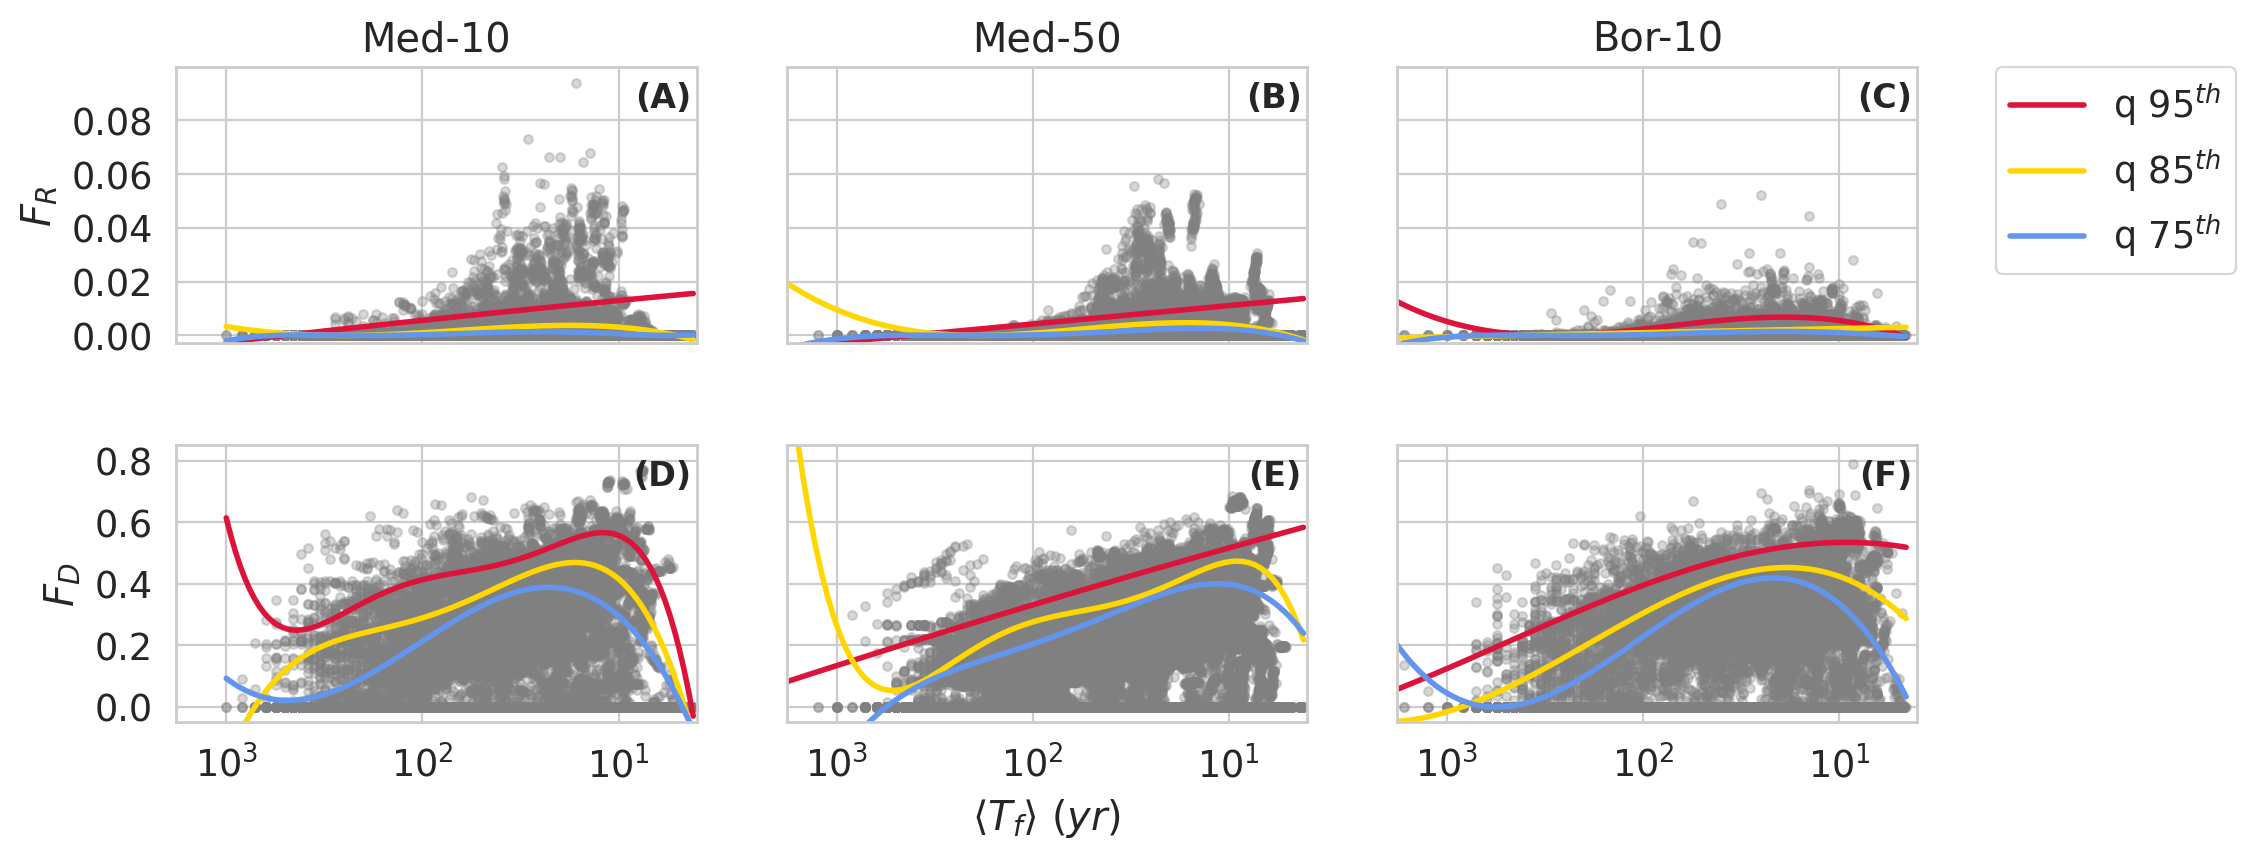

In [ ]:
fig, ax2 = plt.subplots(2,3, figsize=(12,5), sharex=True, sharey='row', dpi=200)

n=10
i = 0
biome='med'
plot_qreg_fdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=50
i = 1
biome='med'
plot_qreg_fdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

n=10
i = 2
biome='bor'
plot_qreg_fdiv(df2, ax2, i, n, biome, quantiles, colorq, orientation='o', verbose=True)

ax2[1,1].set_xlabel(r"$\langle T_f \rangle$ ($yr$)")

for ax in ax2.flatten():
    ax.invert_xaxis()
    ax.set(xlim=(np.log10(frt_max),np.log10(frt_min)))
    ticks = [1, 2, 3]
    ax.set_xticks(ticks)
    ax.set_xticklabels([fr'$10^{i}$' for i in ticks])


for ax in ax2[0]:
    ax.set_yticks(np.arange(0.0, 0.1, 0.02))
    ax.set_ylim([-0.003,0.1])

for ax in ax2[1]:
    ax.set_yticks(np.arange(0.0, 0.9, 0.2))
    ax.set_ylim([-0.05,0.85])

ax2[0,0].set_title('Med-10')
ax2[0,1].set_title('Med-50')
ax2[0,2].set_title('Bor-10')

letters = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)']
for i, ax in enumerate(ax2.flat):
    ax.text(0.99, 0.95, letters[i], transform=ax.transAxes, fontsize=12, fontweight='bold', 
            va='top', ha='right')

ax2[0,-1].legend(bbox_to_anchor=(1.15, 1), loc="upper left", borderaxespad=0)
# ax2[0,0].legend()
plt.tight_layout()

### Correlation of Biodiversity indicators

In [70]:
data = pd.read_csv(os.path.join(fpath_out, 'coms-fire-bioindex-fd.csv'))
data['eco-type'] = data['biome'] + data['N'].astype(str)
data.loc[data['eco-type']=='med10','eco-type'] = 'Med-10'
data.loc[data['eco-type']=='med50','eco-type'] = 'Med-50'
data.loc[data['eco-type']=='bor10','eco-type'] = 'Bor-10'
data

Unnamed: 0 biome   N  ncom  init         frt  srichness  isimpson  \
0               0   med  10     1     1  294.117645          2  1.988945   
1               1   med  10     1     2  200.000000          2  1.965369   
2               2   med  10     1     3  333.333344          2  1.995296   
3               3   med  10     1     4  384.615387          2  1.998177   
4               4   med  10     1     5  416.666656          2  1.998989   
...           ...   ...  ..   ...   ...         ...        ...       ...   
99995       99995   med  50  1000    48  142.857147          3  1.198755   
99996       99996   med  50  1000    49  172.413788          3  1.197153   
99997       99997   med  50  1000    50  147.058823          3  1.203484   
99998       99998   med  50  1000    51  142.857147          3  1.196005   
99999       99999   med  50  1000    52  178.571426          3  1.196925   

          frichness  fdivergence eco-type  
0      2.650758e-07     0.211732   Med-10  
1      2.582685e-07     0.220906   Med-10  
2      2.689386e-07     0.222537   Med-10  
3      2.697325e-07     0.222559   Med-10  
4      2.657836e-07     0.212782   Med-10  
...             ...          ...      ...  
99995  8.885737e-05     0.109243   Med-50  
99996  1.111048e-04     0.115042   Med-50  
99997  1.300694e-04     0.120101   Med-50  
99998  7.591431e-05     0.106855   Med-50  
99999  1.038989e-04     0.113897   Med-50  

[100000 rows x 11 columns]

#### Functional Diversity and Species Richness (Fig. 4)

In [71]:
# Define the custom correlation function
def corrfunc(ax, x, y, cmap, norm, scatter_kws):
    r, _ = scs.pearsonr(x, y)
    
    # Set the regression line color dynamically based on correlation
    line_color = cmap(norm(r))  # Match line color with heatmap color
    sns.regplot(x=x, y=y, scatter_kws=scatter_kws, line_kws={'color': line_color, 'linewidth': 2}, ax=ax)
    
    # Add annotation in the upper-left corner
    bbox_props = dict(boxstyle="square", edgecolor="black", facecolor=line_color, alpha=0.8)
    ax.annotate(f"r={r:.2f}", xy=(0.74, 0.97), xycoords='axes fraction', color='black', size=12, ha='left', va='top', bbox=bbox_props)

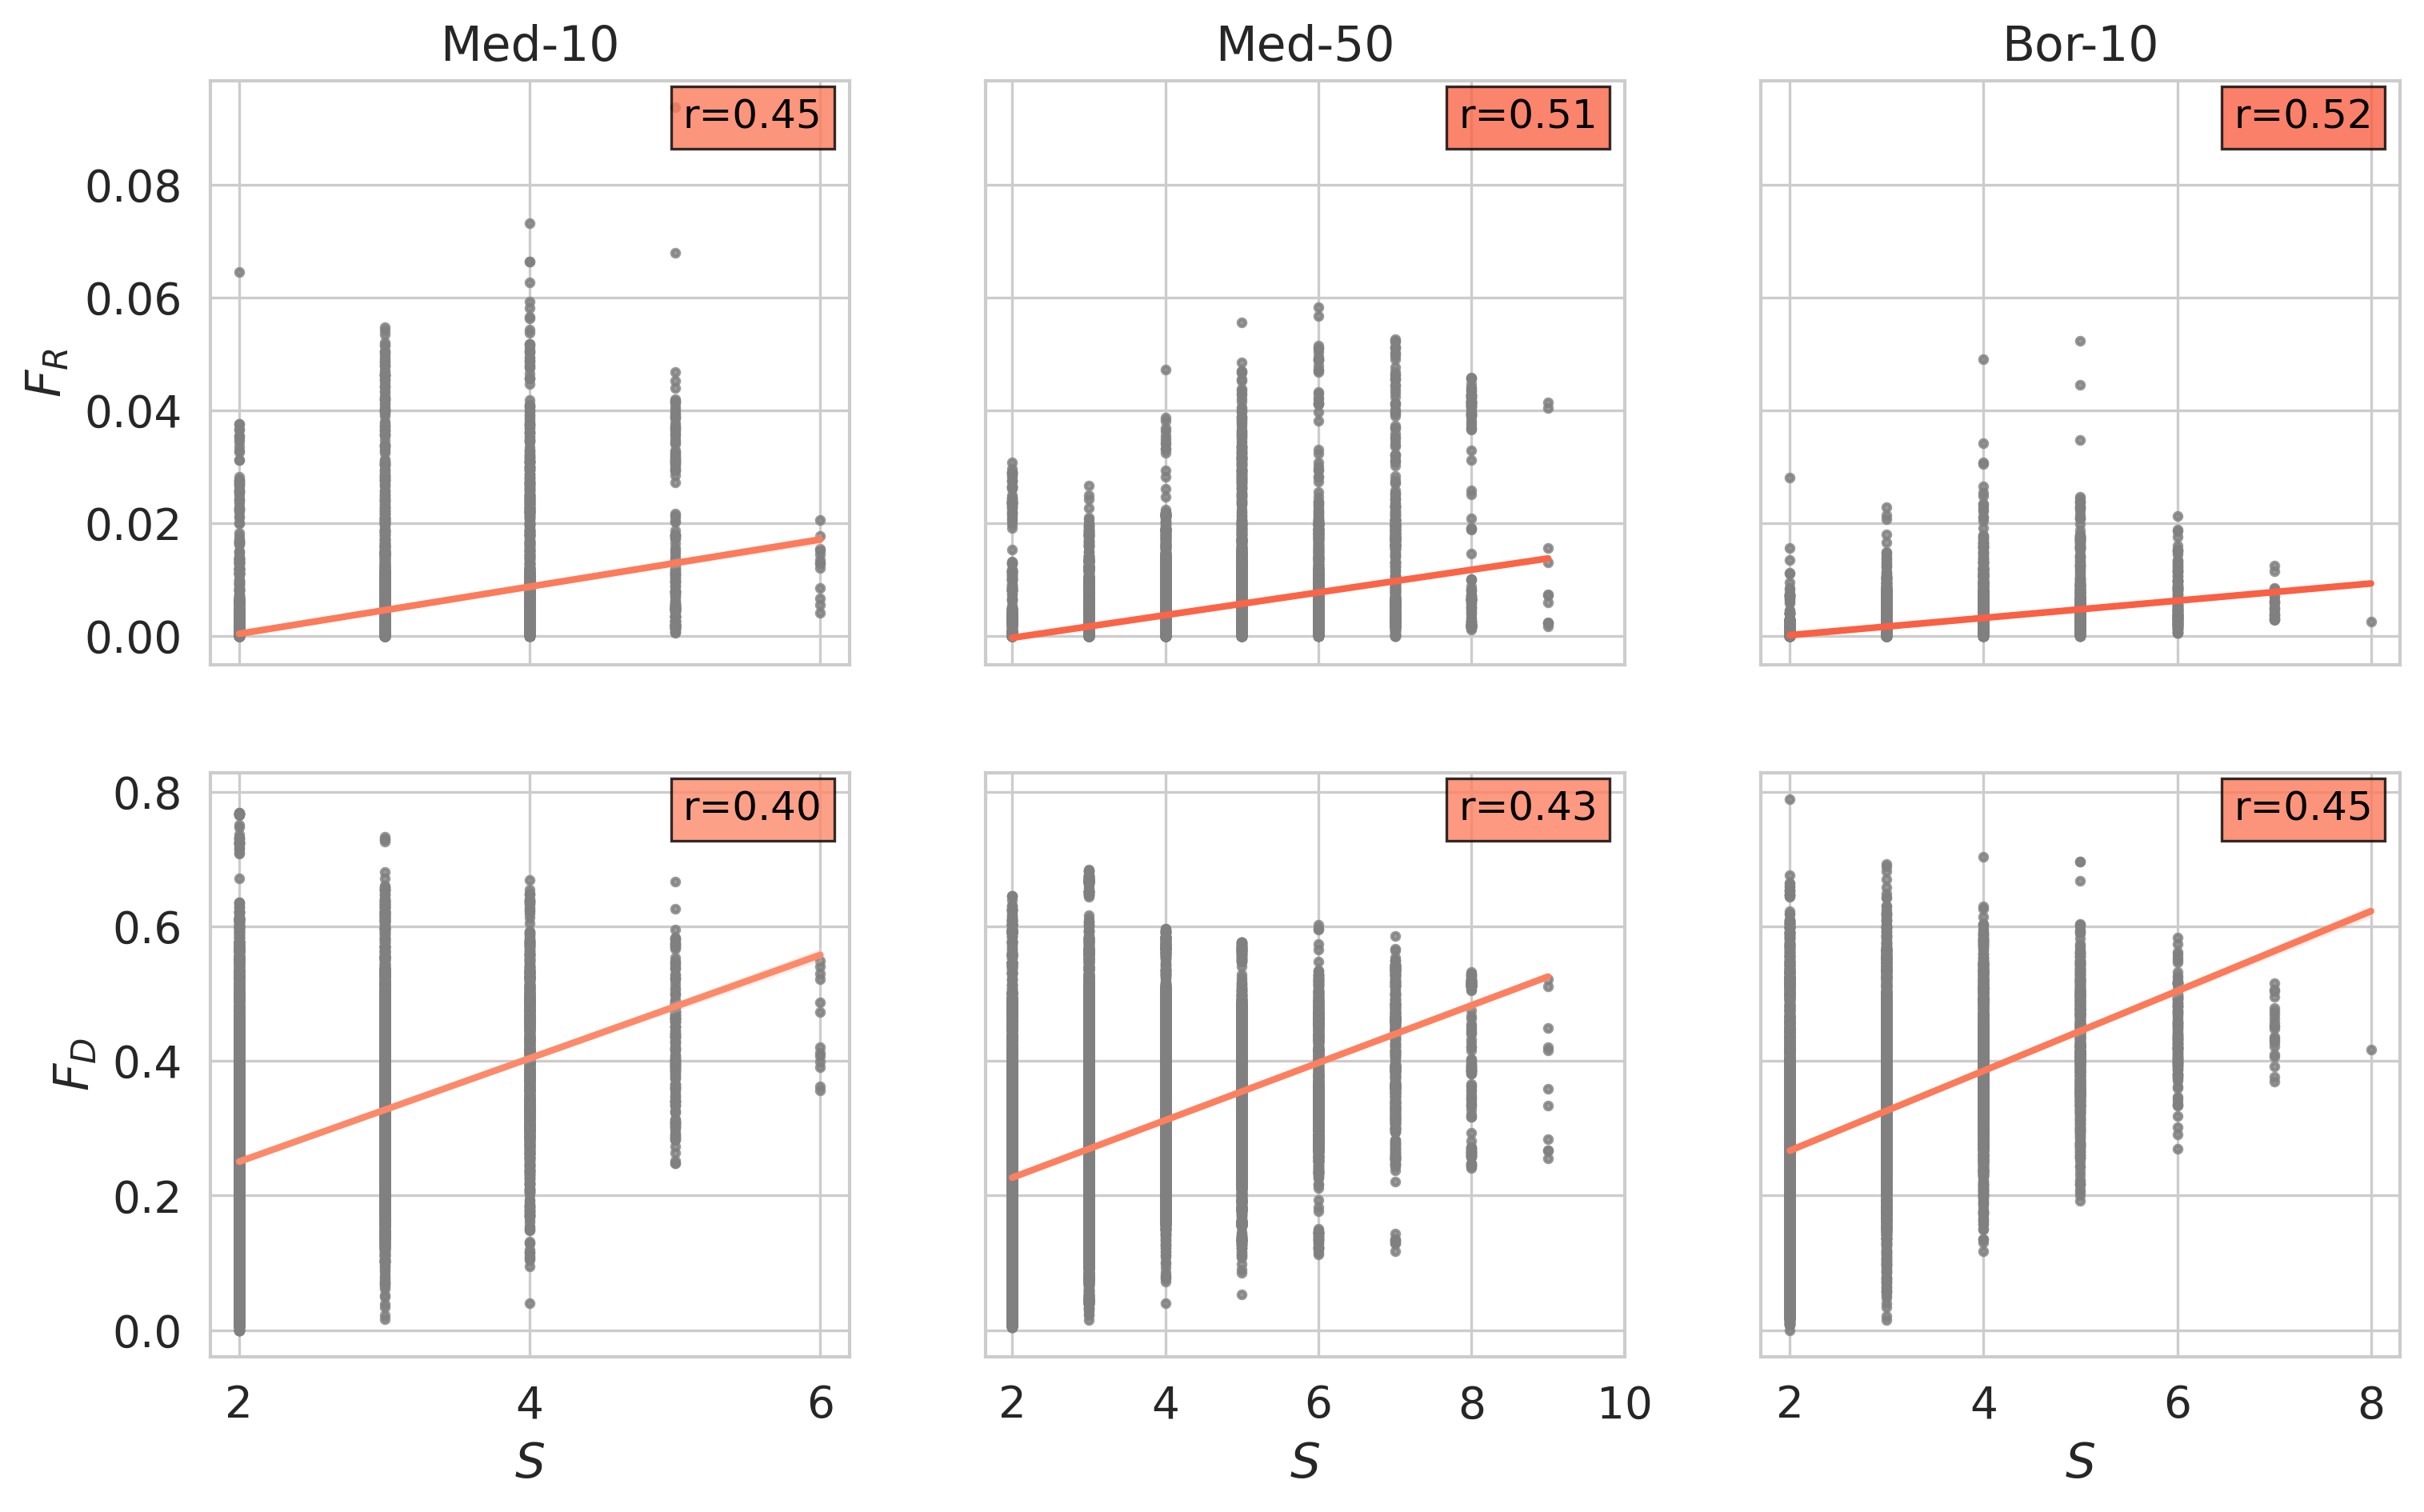

In [74]:
# Set up color map and normalization
cmap_corr = mpl.colormaps['Reds']
norm_corr = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=True)

# Load data
data = pd.read_csv(os.path.join(fpath_out, 'coms-fire-bioindex-fd.csv'))
df = data[(data['biome']=='med') & (data['N']==10)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d1 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})
df = data[(data['biome']=='med') & (data['N']==50)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d2 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})
df = data[(data['biome']=='bor') & (data['N']==10)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d3 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})

# Variables to plot
x_vars = ["$S$"]
y_vars = ["$F_R$", "$F_D$"]

# Create the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7), sharex='col', sharey='row', dpi=300)
scatter_kws = {'s': 5, 'color': 'grey'}

# Plot the first dataset
for i, y_var in enumerate(y_vars):
    ax = axes[i, 0]
    corrfunc(ax, d1["$S$"], d1[y_var], cmap_corr, norm_corr, scatter_kws)
axes[0,0].set_title("Med-10")

# Plot the second dataset
for i, y_var in enumerate(y_vars):
    ax = axes[i, 1]
    corrfunc(ax, d2["$S$"], d2[y_var], cmap_corr, norm_corr, scatter_kws)
    ax.set_xticks([2,4,6,8,10])
axes[0,1].set_title("Med-50")

for i, y_var in enumerate(y_vars):
    ax = axes[i, 2]
    corrfunc(ax, d3["$S$"], d3[y_var], cmap_corr, norm_corr, scatter_kws)
axes[0,2].set_title("Bor-10")

for ax in axes.flatten():
    ax.label_outer()

# Add a shared colorbar
# cbar_ax = fig.add_axes([0.9, 0.2, 0.03, 0.6])  # [left, bottom, width, height]
# sm = ScalarMappable(norm=norm_corr, cmap=cmap_corr)
# cbar = fig.colorbar(sm, cax=cbar_ax)
# cbar.set_label("Pearson Correlation Coefficient", rotation=270, labelpad=15)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar

### Biodiversity indices correlation (Fig. E1)

In [25]:
def corrfunc(x, y, **kwds):
    cmap = kwds['cmap']
    norm = kwds['norm']
    ax = plt.gca()
    # sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = scs.pearsonr(x, y)
    
    # Set the regression line color dynamically based on correlation
    scatter_kws = kwds.get('scatter_kws', {'s': 10, 'color': 'pink'})
    line_color = cmap(norm(r))  # Match line color with heatmap color
    line_kws = kwds.get('line_kws', {'color': line_color, 'linewidth': 2})
    sns.regplot(x=x, y=y, scatter_kws=scatter_kws, line_kws=line_kws, ax=ax)
    
    # Add annotation in the upper-left corner
    bbox_props = dict(boxstyle="square", edgecolor="black", facecolor=line_color, alpha=0.8)
    ax.annotate(f"r={r:.2f}", xy=(0.72, 0.97), xycoords='axes fraction', color='black', size=12, ha='left', va='top', bbox=bbox_props)
    # ax.annotate(f"r={r:.2f}", xy=(0.08, 0989), xycoords='axes fraction', color='black', size=12, ha='left', va='top')
    # ax.set_title(f"r={r:.2f}")
    
# sns.set_theme(context="paper", style="white", font_scale=1.5, rc={"lines.linewidth": 2})

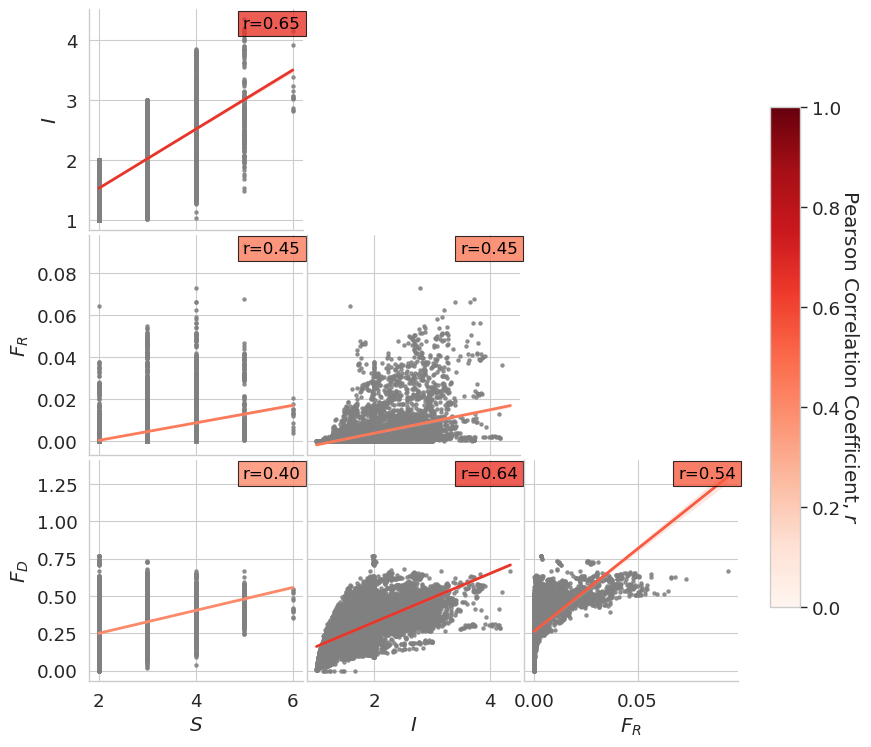

In [26]:
cmap_corr = mpl.colormaps['Reds']
norm_corr = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=True)

data = pd.read_csv(os.path.join(fpath_out, 'coms-fire-bioindex-fd.csv'))
df = data[(data['biome']=='med') & (data['N']==10)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d1 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})


g = sns.PairGrid(d1)
g.map_lower(corrfunc, cmap=cmap_corr, norm=norm_corr, scatter_kws={'s': 5, 'color': 'grey'})
# g.map_diag(sns.histplot, kde=False, element="step", color='grey')
# g.map_upper(corr_heat, cmap=cmap_corr, norm=norm_corr, grid=False)

# Remove diagonal and upper triangle by hiding the axes
for i in range(len(d1.columns)):
    for j in range(len(d1.columns)):
        if i <= j:  # Diagonal and upper triangle
            g.axes[i, j].set_visible(False)

# Add colorbar
fig = g.fig
cbar_ax = fig.add_axes([0.78, 0.15, 0.03, 0.5])  # [left, bottom, width, height] in figure coordinates
sm = ScalarMappable(norm=norm_corr, cmap=cmap_corr)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Pearson Correlation Coefficient, $r$", rotation=270, labelpad=15)

# g.figure.suptitle('Med-10')
g.fig.subplots_adjust(wspace=0.02, hspace=0.02)

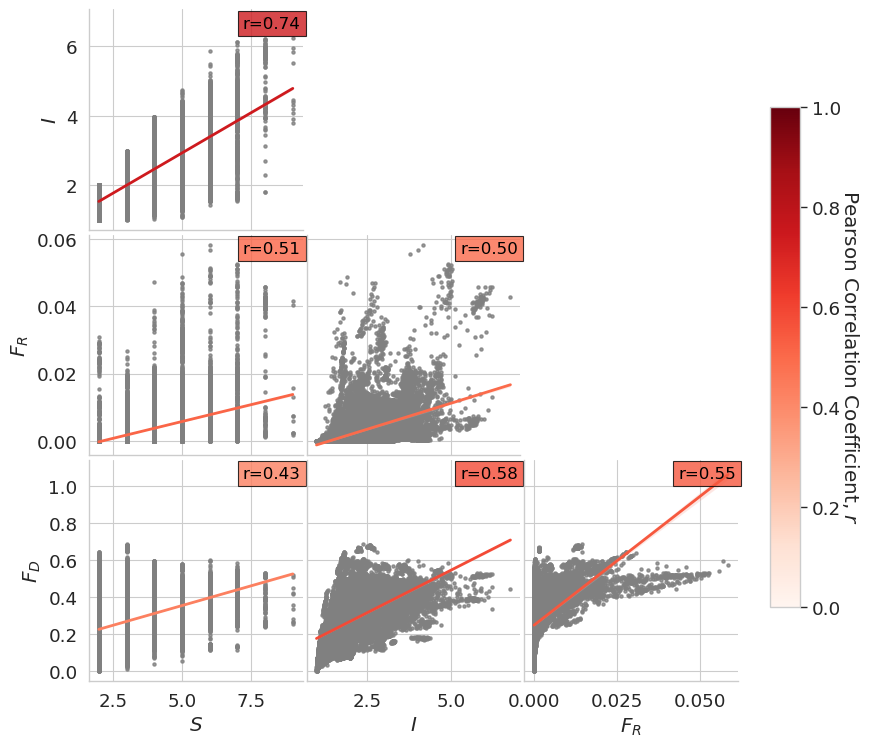

In [27]:
cmap_corr = mpl.colormaps['Reds']
norm_corr = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=True)

data = pd.read_csv(os.path.join(fpath_out, 'coms-fire-bioindex-fd.csv'))
df = data[(data['biome']=='med') & (data['N']==50)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d1 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})

g = sns.PairGrid(d1)
g.map_lower(corrfunc, cmap=cmap_corr, norm=norm_corr, scatter_kws={'s': 5, 'color': 'grey'})
# g.map_diag(sns.histplot, kde=False, element="step", color='grey')
# g.map_upper(corr_heat, cmap=                _corr, norm=norm_corr, grid=False)

# Remove diagonal and upper triangle by hiding the axes
for i in range(len(d1.columns)):
    for j in range(len(d1.columns)):
        if i <= j:  # Diagonal and upper triangle
            g.axes[i, j].set_visible(False)

# Add colorbar
fig = g.fig
cbar_ax = fig.add_axes([0.78, 0.15, 0.03, 0.5])  # [left, bottom, width, height] in figure coordinates
sm = ScalarMappable(norm=norm_corr, cmap=cmap_corr)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Pearson Correlation Coefficient, $r$", rotation=270, labelpad=15)

# g.figure.suptitle('Bor-10')
g.fig.subplots_adjust(wspace=0.02, hspace=0.02)

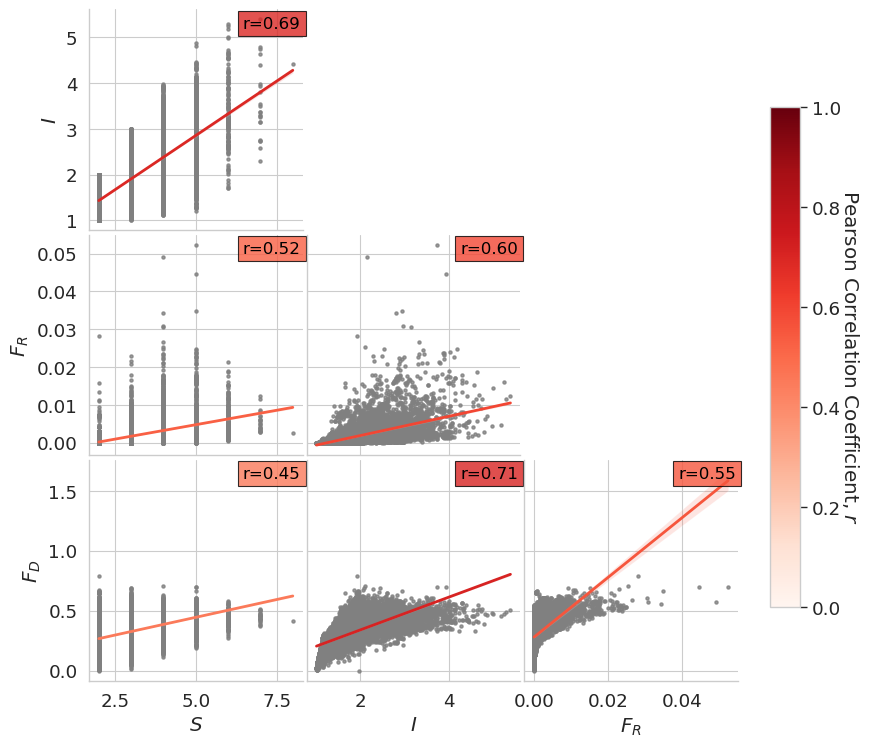

In [28]:
cmap_corr = mpl.colormaps['Reds']
norm_corr = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=True)

data = pd.read_csv(os.path.join(fpath_out, 'coms-fire-bioindex-fd.csv'))
df = data[(data['biome']=='bor') & (data['N']==10)].set_index(['N', 'ncom', 'init']).drop(columns='Unnamed: 0')
d1 = df[(df['srichness']>1)].iloc[:,2:].rename(columns={'srichness':'$S$', 'isimpson':'$I$', 'frichness':'$F_R$', 'fdivergence':'$F_D$'})

g = sns.PairGrid(d1)
g.map_lower(corrfunc, cmap=cmap_corr, norm=norm_corr, scatter_kws={'s': 5, 'color': 'grey'})
# g.map_diag(sns.histplot, kde=False, element="step", color='grey')
# g.map_upper(corr_heat, cmap=cmap_corr, norm=norm_corr, grid=False)

# Remove diagonal and upper triangle by hiding the axes
for i in range(len(d1.columns)):
    for j in range(len(d1.columns)):
        if i <= j:  # Diagonal and upper triangle
            g.axes[i, j].set_visible(False)

# Add colorbar
fig = g.fig
cbar_ax = fig.add_axes([0.78, 0.15, 0.03, 0.5])  # [left, bottom, width, height] in figure coordinates
sm = ScalarMappable(norm=norm_corr, cmap=cmap_corr)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Pearson Correlation Coefficient, $r$", rotation=270, labelpad=15)

# g.figure.suptitle('Bor-10')
g.fig.subplots_adjust(wspace=0.02, hspace=0.02)